In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pysr import PySRRegressor
from IPython.display import Markdown as md

This file pretends to fit data from CLASS to obtain an analytic formula for T(k). Now let's import T(k):

In [8]:
def accuracy(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    b = 0
    
    for i in range(l):
        a = abs((data[i] - model[i]) / data[i])
        b += a
    
    return 100 * b / l

In [9]:
tf = pd.read_csv('TF_16cosmo.csv')
k = tf['k (h/Mpc)'].values
x = tf['x'].values
T = tf['T(k)'].values

In [10]:
x = x.reshape(-1,1)

Let's define a Regressor:

In [11]:
model = PySRRegressor(
    model_selection="best",
    niterations=1000,  # < Increase me for better results
    
    binary_operators=["+","*","-","/","^"],
    constraints={'^': (2, 1)},
    nested_constraints={"^": {"^": 2}},
    maxsize=20,
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
    turbo=True,  
    #cluster_manager=cluster[1],
    #multithreading=True,
)

In [26]:
model.from_file('hall_of_fame_2023-08-29_163723.264.pkl')

Checking if hall_of_fame_2023-08-29_163723.264.pkl exists...
Loading model from hall_of_fame_2023-08-29_163723.264.pkl


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                         0.59597707   
	1         2.727410                                 (0.031959273 ^ x0)   
	2         0.273589                   ((0.03856033 ^ x0) * 0.97440577)   
	3         0.148748  (((0.033028357 ^ x0) * 0.95535845) - -0.020184...   
	4         0.247018  (((0.054214504 ^ x0) - -0.09725388) / (1.11956...   
	5         0.163339  (((0.018899752 ^ x0) + 0.17701131) / ((x0 ^ 1....   
	6         0.006272  (((0.022751944 ^ x0) + 0.17833948) / (((x0 ^ 1...   
	7         0.105146  (((0.018303636 ^ x0) + 0.17364132) / ((x0 - -1...   
	8         0.000149  (((0.018303636 ^ x0) + (0.17364132 ^ 0.9995132...   
	9   >>>>  0.118298  (((0.6802852 ^ 0.082423635) / (x0 + ((((x0 ^ 1...   
	10        0.025445  (((0.6802852 ^ 0.07809298) / (x0 + (((((x0 ^ 1...   
	11        0.003974  (((0.6802852 ^ 0.07809298) / (x0 + (((((x0 ^ 1...   
	12        0.003711  (((0.6802852 ^ 0.07809298) / (x0 + (((((x0 ^ 1...   
	
	        loss  complexity  
	0   0.171494           1  
	1   0.000733           3  
	2   0.000424           5  
	3   0.000315           7  
	4   0.000192           9  
	5   0.000139          11  
	6   0.000137          13  
	7   0.000111          15  
	8   0.000111          17  
	9   0.000088          19  
	10  0.000083          21  
	11  0.000083          23  
	12  0.000082          25  
]

In [28]:
df = pd.read_csv('hall_of_fame_2023-08-29_163723.264.csv')
print(df['Equation'][10])

(((0.6802852 ^ 0.07809298) / (x0 + (((((x0 ^ 1.5150192) / 0.07809298) + x0) + x0) * (x0 * 0.6802852)))) * x0)


try #2 (hall_of_fame_2023-08-29_163723.264.csv)

$$    T(x)=\frac{{(0.6802852^{0.07809298})}}{{x_0 + \left(\left(\frac{{(x_0^{1.5150192})}}{{0.07809298}} + x_0\right) + x_0\right) \cdot (x_0 \cdot 0.6802852)}} \cdot x_0 = \frac{1}{1.031+1.402x+8.977x^{1.515}}$$

$$  $$

In [41]:
T_f = (((0.6802852**0.07809298) / (x + (((((x**1.5150192) / 0.07809298) + x) + x) * (x * 0.6802852)))) * x)
pr = 1 / (1.031 + 8.977 * x ** 1.515 + 1.402 * x)

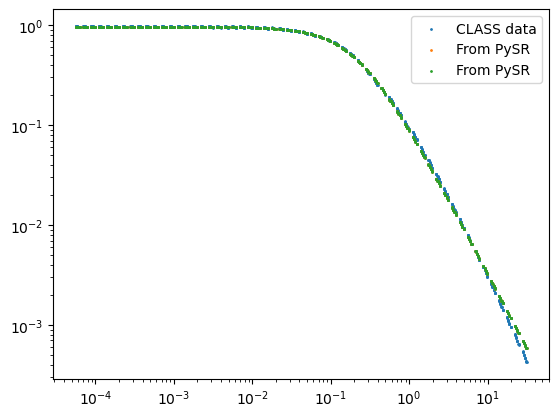

In [47]:
plt.scatter(x,T, s=1, label='CLASS data')
plt.scatter(x, T_f, s=1, label='From PySR')
plt.scatter(x, pr, s=1, label='From PySR')
plt.loglog()
plt.legend()
plt.show()

In [46]:
accuracy(T,T_f)

array([3.83360357])

[]

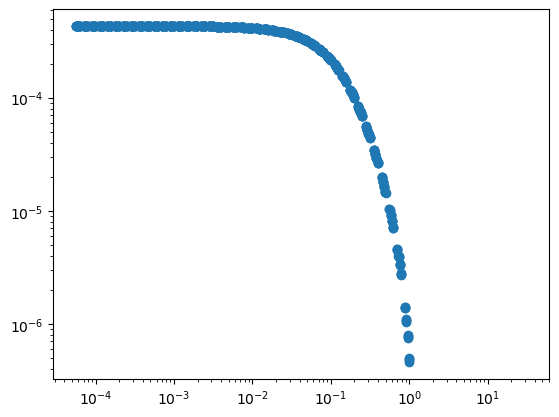

In [44]:
plt.scatter(x, T_f-pr)
plt.loglog()